# The Effect of COVID-19 on the Starbucks Stock Price

The following shows historical data of Starbucks Stock (SBUX) since the company went public all the way to November 24 2021. COVID-19 has led the Starbucks corporation to undergo changes in its retail strategy. Shop closures in both the US (over 400 closures so far, https://www.cnn.com/2020/06/10/business/starbucks-closing-400-stores/index.html) and Canada (up to 300 stores https://www.cbc.ca/news/starbucks-closures-1.5871231) and a shift to a drive-thru, takeaway model (https://www.businessinsider.com/starbucks-plans-to-close-up-to-400-stores-in-us-2020-6), that combined with a recent teaming-up with Amazon to open cashier-less stores https://www.tipranks.com/news/starbucks-teams-with-amazon-to-launch-one-of-a-kind-store, is signalling a change in the business model of the corporation. Other factors to bear in mind are the presence of the brand in markets such as the Chinese, as well as the general impact of the increase of minimum wages across the broad in the US. 

Such a shift and conditions beg the following question: in a pandemic-ridden, increasingly automated world, is SBUX an attractive stock?


Also, how did the stock fare since late 2019 until now compared to the stock of competitors such as the McDonald's Corporation (MCD) and Restaurant Brands International Inc. (QSR.TO), which owns Tim Hortons, companies that hold brands whose business models are rooted in drive-thrus and takeaways?

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import statsmodels.api as sm
from datetime import datetime
from datetime import date
import seaborn as sns
sns.set_style('darkgrid')

In [10]:
#Date column in all data sets is of the 'object' type. It has to be transformed into an index.
sbux = pd.read_csv(r"C:\Users\migue\OneDrive\Desktop\Bootcamp Projects\Project 3 - Miguel Pallás\Starbucks_Stock_Adjusted.csv")
mcd = pd.read_csv(r"C:\Users\migue\OneDrive\Desktop\Bootcamp Projects\Project 3 - Miguel Pallás\MCD.csv")
qsr = pd.read_csv(r"C:\Users\migue\OneDrive\Desktop\Bootcamp Projects\Project 3 - Miguel Pallás\QSR.csv")
sbux.drop(columns = ['Date_1'], inplace= True)

In [11]:
sbux

,Date,Open,High,Low,Close,Adj_Close,Volume
0,1992-06-26T00:00:00Z,0.328125,0.347656,0.320313,0.335938,0.276218,224358400
1,1992-06-29T00:00:00Z,0.339844,0.367188,0.332031,0.359375,0.295489,58732800
2,1992-06-30T00:00:00Z,0.367188,0.371094,0.343750,0.347656,0.285853,34777600
3,1992-07-01T00:00:00Z,0.351563,0.359375,0.339844,0.355469,0.292277,18316800
4,1992-07-02T00:00:00Z,0.359375,0.359375,0.347656,0.355469,0.292277,13996800
...,...,...,...,...,...,...,...
7405,2021-11-18T00:00:00Z,112.120003,113.230003,111.339996,112.900002,112.900002,5632100
7406,2021-11-19T00:00:00Z,112.730003,112.900002,109.769997,110.779999,110.779999,6921800
7407,2021-11-22T00:00:00Z,111.110001,112.589996,110.669998,111.449997,111.449997,5967300
7408,2021-11-23T00:00:00Z,112.000000,114.110001,111.779999,113.580002,113.580002,7911000


In [12]:
mcd

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,198.000000,200.800003,197.809998,200.789993,192.579193,3554200
1,2020-01-03,199.389999,200.550003,198.850006,200.080002,191.898239,2767600
2,2020-01-06,199.600006,202.770004,199.350006,202.330002,194.056229,4660400
3,2020-01-07,201.869995,202.679993,200.509995,202.630005,194.343964,4047400
4,2020-01-08,202.619995,206.690002,202.199997,205.910004,197.489853,5284200
...,...,...,...,...,...,...,...
474,2021-11-17,252.410004,253.339996,250.520004,252.690002,252.690002,1412000
475,2021-11-18,253.160004,253.490005,251.080002,253.479996,253.479996,1751200
476,2021-11-19,253.289993,253.320007,250.229996,251.949997,251.949997,2743100
477,2021-11-22,252.669998,255.449997,252.210007,253.479996,253.479996,2438700


In [13]:
qsr

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,63.799999,64.959999,63.779999,64.699997,60.696114,8460500
1,2020-01-03,64.370003,65.050003,63.990002,64.440002,60.452206,2806400
2,2020-01-06,64.279999,64.410004,62.970001,63.110001,59.204514,2706300
3,2020-01-07,63.000000,64.209999,63.000000,63.389999,59.467182,3092800
4,2020-01-08,62.820000,62.970001,62.099998,62.410000,58.547829,4818900
...,...,...,...,...,...,...,...
474,2021-11-17,57.220001,58.270000,57.099998,57.830002,57.830002,1129400
475,2021-11-18,57.830002,58.020000,56.810001,56.880001,56.880001,868000
476,2021-11-19,56.500000,57.270000,56.349998,57.209999,57.209999,1263100
477,2021-11-22,57.299999,58.320000,57.000000,58.049999,58.049999,1512900


As seen above, both the mcd and the qsr data sets have the same length, whereas sbux contains more data points. There are some reasons as to why is that. One of the purposes of this project is to get an overview of the historical data related to the SBUX stock, from the time the company went public to the present times. The focus then will be shifted to the performance of the stock during the pandemic and beyond. 

Once analyzed individually, the monthly returns yielded by each stock during 2020 and the current year are going to be compared. For that reason, the scope for the mcd and qsr data sets is shorter.

In [14]:
#transform the Date column into index for time series analysis (for all three data sets). Method shown here applies to sbux2, mcd2, and qsr2
datetime_series_conversion = pd.to_datetime(sbux['Date']) #casting column into datetime type
datetime_index = pd.DatetimeIndex(datetime_series_conversion.values) #converting it into an index
sbux2 = sbux.set_index(datetime_index) #setting the index 
sbux2.drop('Date', axis=1, inplace=True) #removing duplicities
sbux2.isnull() #checking for NaN values
sbux2.dtypes #checking for datatypes
sbux2

,Open,High,Low,Close,Adj_Close,Volume
1992-06-26,0.328125,0.347656,0.320313,0.335938,0.276218,224358400
1992-06-29,0.339844,0.367188,0.332031,0.359375,0.295489,58732800
1992-06-30,0.367188,0.371094,0.343750,0.347656,0.285853,34777600
1992-07-01,0.351563,0.359375,0.339844,0.355469,0.292277,18316800
1992-07-02,0.359375,0.359375,0.347656,0.355469,0.292277,13996800
...,...,...,...,...,...,...
2021-11-18,112.120003,113.230003,111.339996,112.900002,112.900002,5632100
2021-11-19,112.730003,112.900002,109.769997,110.779999,110.779999,6921800
2021-11-22,111.110001,112.589996,110.669998,111.449997,111.449997,5967300
2021-11-23,112.000000,114.110001,111.779999,113.580002,113.580002,7911000


In [15]:
datetime_series_conversion = pd.to_datetime(mcd['Date'])
datetime_index = pd.DatetimeIndex(datetime_series_conversion.values) 
mcd2 = mcd.set_index(datetime_index) 
mcd2.drop('Date', axis=1, inplace=True) 
mcd2.rename(columns = {'Adj Close' : 'Adj_Close'}, inplace = True)
mcd2.isnull()
mcd2.dtypes
mcd2

,Open,High,Low,Close,Adj_Close,Volume
2020-01-02,198.000000,200.800003,197.809998,200.789993,192.579193,3554200
2020-01-03,199.389999,200.550003,198.850006,200.080002,191.898239,2767600
2020-01-06,199.600006,202.770004,199.350006,202.330002,194.056229,4660400
2020-01-07,201.869995,202.679993,200.509995,202.630005,194.343964,4047400
2020-01-08,202.619995,206.690002,202.199997,205.910004,197.489853,5284200
...,...,...,...,...,...,...
2021-11-17,252.410004,253.339996,250.520004,252.690002,252.690002,1412000
2021-11-18,253.160004,253.490005,251.080002,253.479996,253.479996,1751200
2021-11-19,253.289993,253.320007,250.229996,251.949997,251.949997,2743100
2021-11-22,252.669998,255.449997,252.210007,253.479996,253.479996,2438700


In [16]:
datetime_series_conversion = pd.to_datetime(qsr['Date']) 
datetime_index = pd.DatetimeIndex(datetime_series_conversion.values) 
qsr2 = qsr.set_index(datetime_index) 
qsr2.drop('Date', axis=1, inplace=True) 
qsr2.rename(columns = {'Adj Close' : 'Adj_Close'}, inplace = True)
qsr2.isnull()
qsr2.dtypes
qsr2

,Open,High,Low,Close,Adj_Close,Volume
2020-01-02,63.799999,64.959999,63.779999,64.699997,60.696114,8460500
2020-01-03,64.370003,65.050003,63.990002,64.440002,60.452206,2806400
2020-01-06,64.279999,64.410004,62.970001,63.110001,59.204514,2706300
2020-01-07,63.000000,64.209999,63.000000,63.389999,59.467182,3092800
2020-01-08,62.820000,62.970001,62.099998,62.410000,58.547829,4818900
...,...,...,...,...,...,...
2021-11-17,57.220001,58.270000,57.099998,57.830002,57.830002,1129400
2021-11-18,57.830002,58.020000,56.810001,56.880001,56.880001,868000
2021-11-19,56.500000,57.270000,56.349998,57.209999,57.209999,1263100
2021-11-22,57.299999,58.320000,57.000000,58.049999,58.049999,1512900


The datasets are ready to go now. However, before going any deeper, getting a top-level vision of the stock at their adjusted close price and volume traded is helpful in setting the stage. 

In [17]:
#Manipulate the data set containing the SBUX stock to produce a table with aggregated average data over the years
sbux2['Date'] = sbux2.index #Make a column out of the index
sbux2['Year'] = pd.to_datetime(sbux2['Date'],format='%Y')  
sbux2['Year'] = pd.DatetimeIndex(sbux2['Date']).year #Once turned into an index, the year is extracted
sbux2_yearly_info = sbux2.groupby(sbux2['Year']).mean() #Calculate the values for each column

In [18]:
sbux2_yearly_info['Adj_Close'].pct_change() #get grwoth rate over time for adj_close
sbux2_yearly_info['Growth Rate'] = sbux2_yearly_info['Adj_Close'].pct_change()#obtain percentage rate at adj_close level to see the growth in stock price 
formats = {'Growth Rate': '{:.1%}', 'Volume' : '{:,.2f}'} #reformatting figures for an easier reading
sbux2_yearly_info.sort_values(by = ['Year'], ascending = False, axis=0).style.format(formats)

,Open,High,Low,Close,Adj_Close,Volume,Growth Rate
Year,,,,,,,
2021,111.899603,112.850044,110.922907,111.923392,110.956542,"6,061,760.32",37.4%
2020,82.834111,83.852372,81.722016,82.863992,80.772058,"9,634,833.99",3.7%
2019,81.448492,82.078175,80.781984,81.443214,77.860862,"7,996,699.60",44.7%
2018,57.458685,58.018765,56.988566,57.501873,53.804356,"11,228,243.82",2.5%
2017,57.256374,57.635578,56.890199,57.267849,52.467841,"9,295,893.23",2.9%
2016,56.559921,57.023056,56.098690,56.588889,50.986699,"9,300,221.83",7.6%
2015,53.247361,53.695357,52.723710,53.253869,47.378839,"8,648,356.35",43.0%
2014,37.798750,38.073710,37.494960,37.772540,33.123755,"9,553,164.29",13.6%
2013,33.694722,33.961409,33.437738,33.710833,29.167048,"9,365,088.89",33.5%


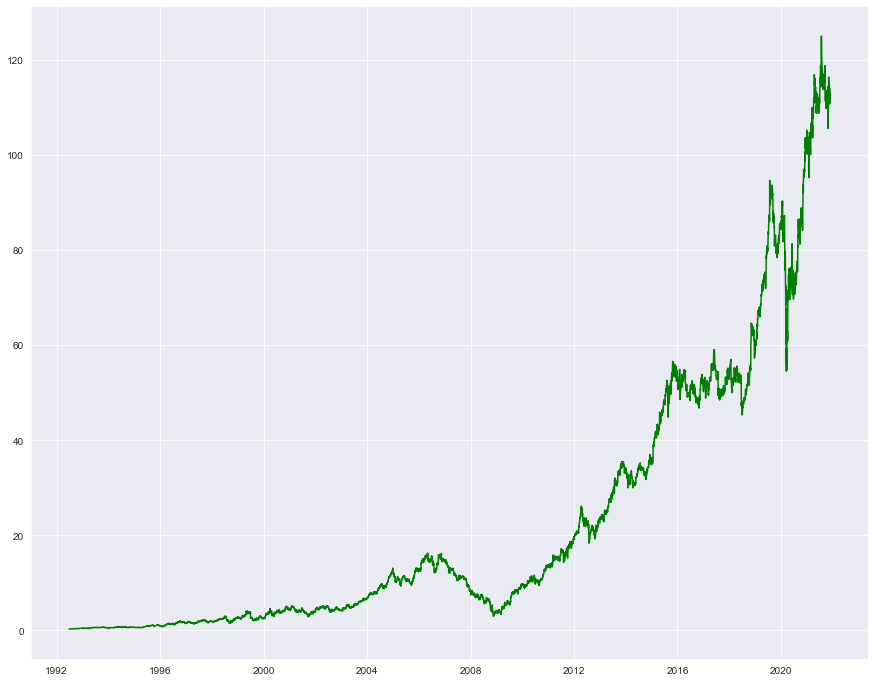

In [19]:
#Plots have been rendered using maplotlib, as I consider it to fit the time series theme better
plt.figure(figsize=(15,12))
plt.plot(sbux2['Adj_Close'], label= 'Evolution of the Price of SBUX', color = 'g')

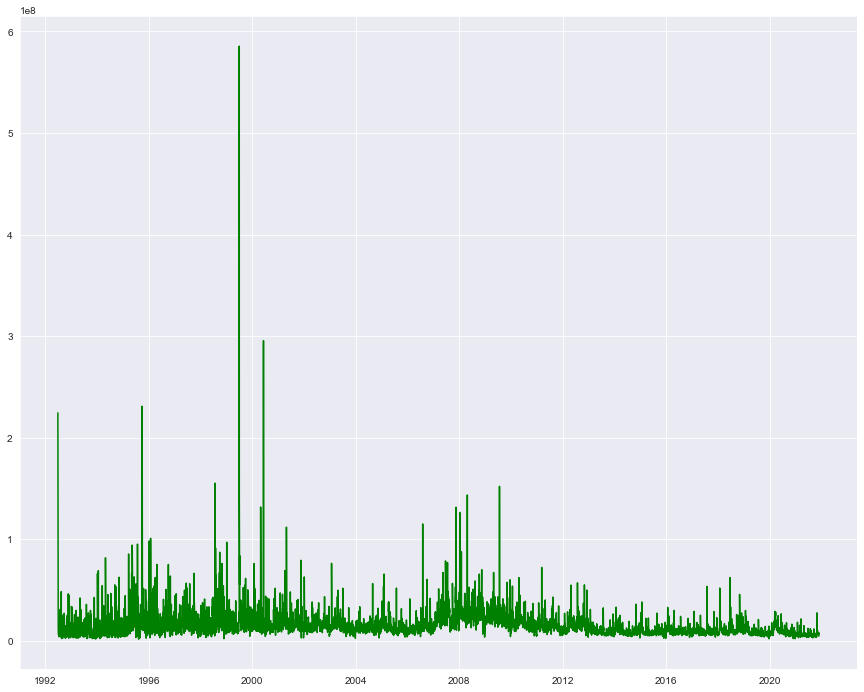

In [20]:
plt.figure(figsize=(15,12))
plt.plot(sbux2['Volume'], label= 'Volume Traded Over Time', color = 'g')

Now that we have established a top view of the performance of the SBUX stock over time, let's focus on how it fared during the last 23 months.

For that, the interval of interest spans from January 1 2021 to November 24 2021. At a quick glance, it looks like the price experienced some ups-and-downs.

<AxesSubplot:title={'center':'Evolution of the SBUX Price January 2020 - November 2021'}>

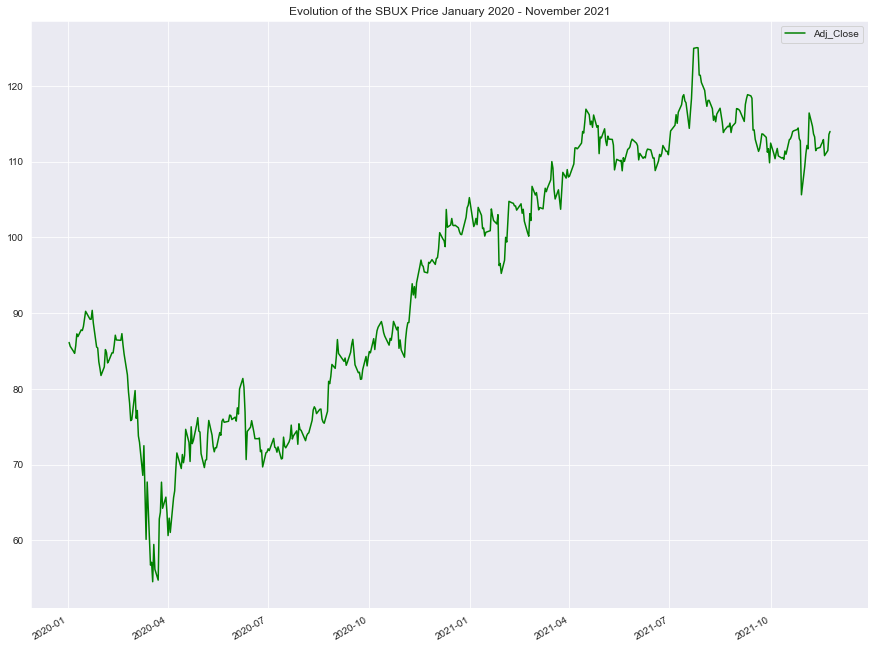

In [21]:
sbux2['Adj_Close'].loc['2020-01-01':].plot(legend=True,figsize=(15,12), color = 'g', y = 'Adj Close Prices', title = 'Evolution of the SBUX Price January 2020 - November 2021')

# MOVING AVERAGES

For the purposes of this analysis, I will focus on the last 40 weeks of the stock's life in relation to the last data point of the set (Novemeber 24 2021), in an attempt to closing-in on the fluctuations and examine whether investors trust this stock amid the shift to take away and the introduction of cashier less stores, or if they should moving on.

The chart shows that the price plummeted in March 2020, but it recovered from May 2021 onwards, going on an upward trend until April 2021. However, from then on, the adjusted close price of the stock experimented some fluctuations.

The Exponential Moving Average (EMA) at different time frames within those 40 weeks should shed some light as to why is that. The EMA places more weight on recent price points, so it can provide useful insight in the event of price changes or trend reversals.

What signals can be collected from it?

Three lines are to be established. A 50-day, 100-day, and 200-day EMA is calculated, and these figures will then be plotted to look at price trends.

In [22]:
covid19_stock = sbux2['Adj_Close'].loc['2021-05-07':] #zooming in on the span of interest. This makes for 200 days to 24/11/2021
covid19_evolution_adj_close_prices = covid19_stock.resample('B').mean() #average prices resampled into business days
covid19_evolution_adj_close_prices

2021-05-07    112.959480
2021-05-10    112.919968
2021-05-11    112.179031
2021-05-12    108.895973
2021-05-13    109.590271
                 ...    
2021-11-18    112.900002
2021-11-19    110.779999
2021-11-22    111.449997
2021-11-23    113.580002
2021-11-24    113.970001
Freq: B, Name: Adj_Close, Length: 144, dtype: float64

In [23]:
time_period_0 = 50 
EMA_50 = covid19_evolution_adj_close_prices.ewm(span=time_period_0, adjust=False).mean() #applying the .ewn method to render the moving average
EMA_50

2021-05-07    112.959480
2021-05-10    112.957931
2021-05-11    112.927385
2021-05-12    112.769291
2021-05-13    112.644623
                 ...    
2021-11-18    112.889651
2021-11-19    112.806919
2021-11-22    112.753707
2021-11-23    112.786111
2021-11-24    112.832538
Freq: B, Name: Adj_Close, Length: 144, dtype: float64

In [24]:
time_period_1 = 100
EMA_100 = covid19_evolution_adj_close_prices.ewm(span=time_period_1, adjust=False).mean()
EMA_100

2021-05-07    112.959480
2021-05-10    112.958698
2021-05-11    112.943259
2021-05-12    112.863114
2021-05-13    112.798306
                 ...    
2021-11-18    113.425051
2021-11-19    113.372673
2021-11-22    113.334601
2021-11-23    113.339460
2021-11-24    113.351946
Freq: B, Name: Adj_Close, Length: 144, dtype: float64

In [25]:
time_period_2 = 200
EMA_200 = covid19_evolution_adj_close_prices.ewm(span=time_period_2, adjust=False).mean()
EMA_200

2021-05-07    112.959480
2021-05-10    112.959087
2021-05-11    112.951325
2021-05-12    112.910973
2021-05-13    112.877932
                 ...    
2021-11-18    113.524905
2021-11-19    113.497592
2021-11-22    113.477218
2021-11-23    113.478241
2021-11-24    113.483134
Freq: B, Name: Adj_Close, Length: 144, dtype: float64

## Golden and Death Crosses

The following chart displays the different moments the stock has gone through in the last 200 days. Coming from a downward trend in May, it surged around mid-July, setting the ground for a reversal of the trend, as prices went up and the EMA at 50, 100 and 200 days signalled optimism in the stock, but as Summer was going out the door, some time around September, the stock started to trend downards again and rapidly, leaving the golden cross zone and showing signs of slowing down. The effect seems substantiated by the volume trade activity that took place around late October to early November. Over this span, it should be noted that only once the price went below the 107.5 USD (quickly revoering after that) threshold. On the other hand, it reached a historic cieling of 125.033 USD in July, its bottom line seems to be somewhere around 107.5 and 110 USD. However, all three lines are quite close to each other.

If returning to norma, the shift to store models that are going to be more efficient for the company is an attractive feature to consider. In addition, China is one of the company's biggest markets, and recent spikes in COVID-19 cases, combined with employee shortages in the US might counter the positives.


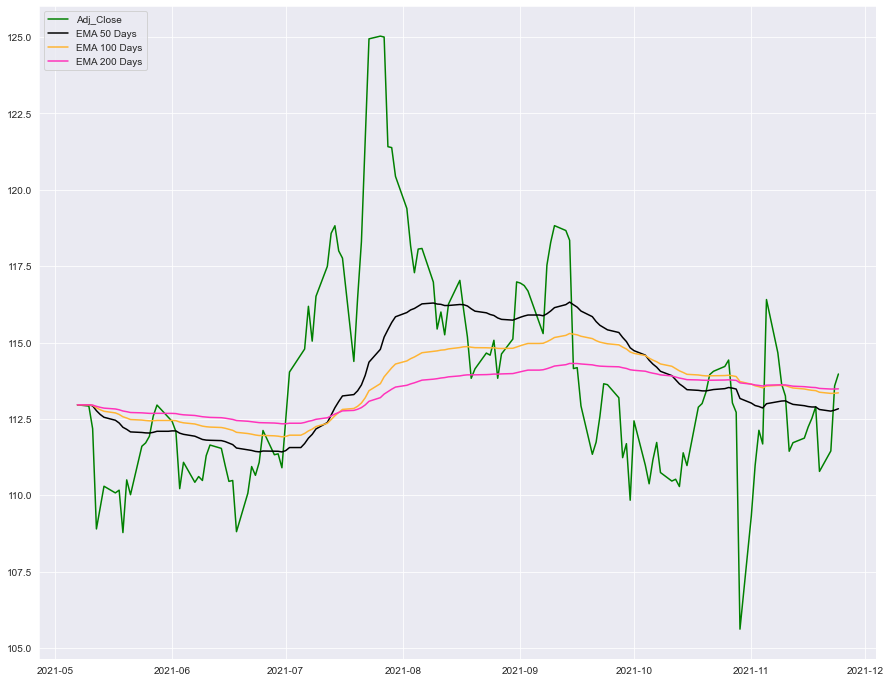

In [26]:
plt.figure(figsize=(15,12))
plt.plot(covid19_stock, label= 'Adj_Close', color = 'g')
plt.plot(EMA_50, label = 'EMA 50 Days', color = 'k')
plt.plot(EMA_100, label = 'EMA 100 Days', color = '#FFB433')
plt.plot(EMA_200, label = 'EMA 200 Days', color = '#FF33BB')
plt.legend(loc=2)

In [27]:
sbux2['Volume'].loc['2021-10-01':].resample('B').last() #volume between October 2021 and November 2021, where recent cross of death happened

2021-10-01     5636900
2021-10-04     4497700
2021-10-05     5884000
2021-10-06     5734500
2021-10-07     5549500
2021-10-08     3786600
2021-10-11     5987300
2021-10-12     3866800
2021-10-13     4806500
2021-10-14     5194900
2021-10-15     5855800
2021-10-18     4958400
2021-10-19     5799300
2021-10-20     7645200
2021-10-21     3684300
2021-10-22     3396400
2021-10-25     4290600
2021-10-26     5948000
2021-10-27     5853900
2021-10-28     7697600
2021-10-29    27401600
2021-11-01    14184600
2021-11-02    11538900
2021-11-03     6422600
2021-11-04     8212600
2021-11-05    10255500
2021-11-08     8753300
2021-11-09     6754700
2021-11-10     6563700
2021-11-11     7191900
2021-11-12     7349400
2021-11-15     6566100
2021-11-16     7965000
2021-11-17     5768600
2021-11-18     5632100
2021-11-19     6921800
2021-11-22     5967300
2021-11-23     7911000
2021-11-24     4391493
Freq: B, Name: Volume, dtype: int64

## Starbucks and Its Competitors - How Did They All Do?

While the previous analysis is showing a recent downward trend in the price of the stock, giving reason to think that the sentiment is of selling, it might help in deciding what position to adopt to deal with the future to analyze Starbuck's stock in relation to the stock of competitors like Mcdonald's (MCU) and Restaurant Brands International Inc. (QSR) from the beginning of 2020 to November 24 2021.

Exploring the Cumulative Returns for the January 2020 - November 2021 Period

In order to analyze the performace of all the stocks in the last 23 months by looking at the percentual change rate in their adjusted close price over the months. 

In [28]:
#examine the rate of change in adjusted close looking at values at a monthly frquency
sbux2_monthly_returns = sbux2.loc['2020-01-02':]['Adj_Close'].resample('M').ffill().pct_change() 
sbux2_monthly_returns.describe()

count    22.000000
mean      0.018412
std       0.082067
min      -0.161800
25%      -0.036001
50%       0.014635
75%       0.084307
max       0.167174
Name: Adj_Close, dtype: float64

In [29]:
mcd2_monthly_returns = mcd2.loc['2020-01-02':]['Adj_Close'].resample('M').ffill().pct_change()
mcd2_monthly_returns.describe()

count    22.000000
mean      0.011827
std       0.060894
min      -0.148427
25%      -0.012965
50%       0.007692
75%       0.048337
max       0.134321
Name: Adj_Close, dtype: float64

In [30]:
qsr2_monthly_returns = qsr2.loc['2020-01-02':]['Adj_Close'].resample('M').ffill().pct_change()
qsr2_monthly_returns.describe()

count    22.000000
mean      0.006641
std       0.104602
min      -0.307297
25%      -0.052378
50%       0.024685
75%       0.068655
max       0.231576
Name: Adj_Close, dtype: float64

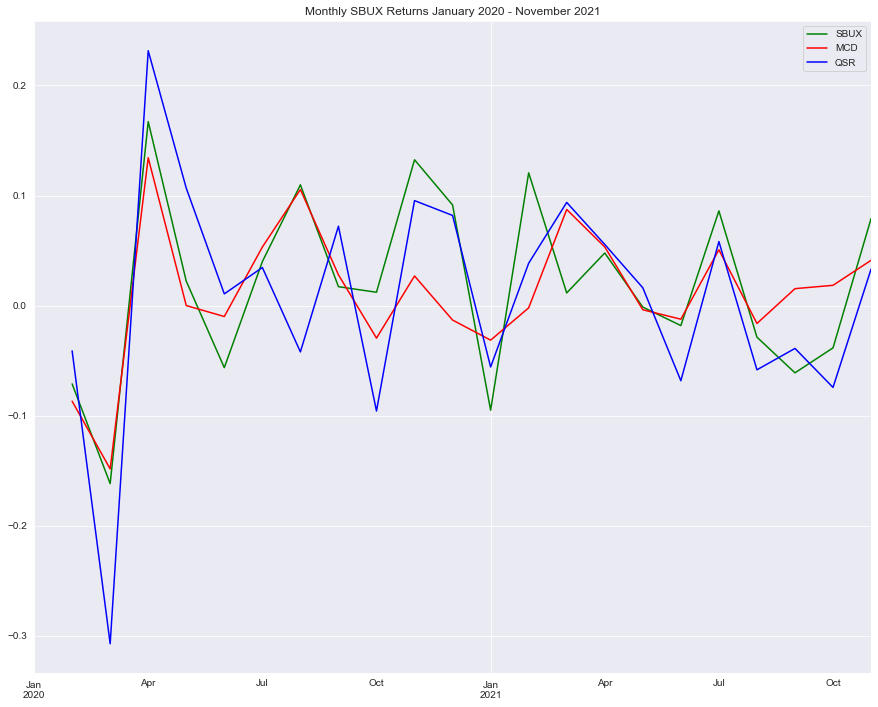

In [31]:
fig = plt.figure() #plotting the evolution of the rate of change for the monthly returns of all three stocks
sbux2_monthly_returns.plot(figsize=(15,12),legend=True, label = 'SBUX', color = 'g', title = 'Monthly SBUX Returns January 2020 - November 2021')
mcd2_monthly_returns.plot(figsize=(15,12),legend=True, label = 'MCD', color = 'r')
qsr2_monthly_returns.plot(figsize=(15,12),legend=True, label = 'QSR', color = 'b')
plt.show()

In [32]:
#cumulative sum of the return history for all three stocks Jan 2020 - November 2021
sbux2_monthly_returns.cumsum()

2020-01-31         NaN
2020-02-29   -0.071136
2020-03-31   -0.232936
2020-04-30   -0.065763
2020-05-31   -0.043597
2020-06-30   -0.100015
2020-07-31   -0.060064
2020-08-31    0.049690
2020-09-30    0.066856
2020-10-31    0.078961
2020-11-30    0.211461
2020-12-31    0.302871
2021-01-31    0.207806
2021-02-28    0.328454
2021-03-31    0.339932
2021-04-30    0.387704
2021-05-31    0.386334
2021-06-30    0.368157
2021-07-31    0.454195
2021-08-31    0.425504
2021-09-30    0.364392
2021-10-31    0.325955
2021-11-30    0.405067
Freq: M, Name: Adj_Close, dtype: float64

In [33]:
mcd2_monthly_returns.cumsum()

2020-01-31         NaN
2020-02-29   -0.086858
2020-03-31   -0.235284
2020-04-30   -0.100963
2020-05-31   -0.100951
2020-06-30   -0.110880
2020-07-31   -0.057701
2020-08-31    0.047761
2020-09-30    0.075721
2020-10-31    0.046153
2020-11-30    0.073065
2020-12-31    0.059912
2021-01-31    0.028502
2021-02-28    0.026425
2021-03-31    0.113744
2021-04-30    0.167015
2021-05-31    0.163210
2021-06-30    0.150811
2021-07-31    0.201549
2021-08-31    0.185282
2021-09-30    0.200653
2021-10-31    0.219068
2021-11-30    0.260200
Freq: M, Name: Adj_Close, dtype: float64

In [34]:
qsr2_monthly_returns.cumsum()

2020-01-31         NaN
2020-02-29   -0.041141
2020-03-31   -0.348437
2020-04-30   -0.116861
2020-05-31   -0.010167
2020-06-30    0.000463
2020-07-31    0.035060
2020-08-31   -0.007049
2020-09-30    0.065092
2020-10-31   -0.030717
2020-11-30    0.064667
2020-12-31    0.146581
2021-01-31    0.090780
2021-02-28    0.129255
2021-03-31    0.222983
2021-04-30    0.278521
2021-05-31    0.294699
2021-06-30    0.226386
2021-07-31    0.284579
2021-08-31    0.226213
2021-09-30    0.187275
2021-10-31    0.112917
2021-11-30    0.146109
Freq: M, Name: Adj_Close, dtype: float64

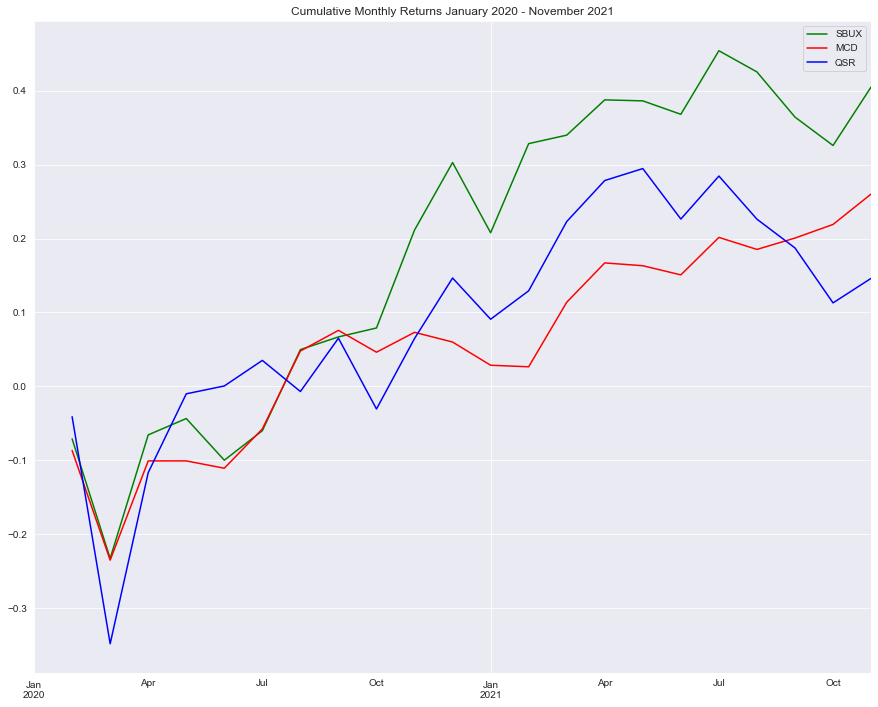

In [35]:
#plotting the cumulative values of said returns in the period Han 2021 - Nove 2021
fig = plt.figure()
(sbux2_monthly_returns).cumsum().plot(color = 'g', title = 'Cumulative Monthly Returns January 2020 - November 2021', label = 'SBUX', legend=True, figsize=(15,12))
(mcd2_monthly_returns).cumsum().plot(color = 'r', label = 'MCD', legend=True)
(qsr2_monthly_returns).cumsum().plot(color = 'b', label = 'QSR', legend=True)
plt.show()

Interestingly enough, the chart and tables show that Stabucks, despite feeling the hit just like its peers, showed signs of strength across the timeframe, yielding higher monthly returns than MCD and QSR. Variation has has been greater for the SBUX stock.

# Does the Information Hold Any Prediction Power?

In an attempt to examine if the times series defined for montlhy returns has any predictive power at all (thus being helpful in making any decisions as to buy, sell or keep SBUX stock).

The independent varaible is the date, whereas the rest of variables are dependant. Among them, my interest is the adjusted closing price (price without the dividends). I am going to use simple linear regression to find the line that fits best all the points that would result in plotting the whole SBUX dataset, so a relationship between time and adjusted close price can be established.

In [143]:
#Volume column turned into float
sbux2['Volume'] = sbux2['Volume'].astype('float64')
#since date is the ind variable, the index is going to be turned into datetime data type
sbux2['Date'] = sbux2.reset_index(inplace=True)


ValueError: cannot insert level_0, already exists

In [132]:
#turning the index into an array so it can be used in fitting the LR model
X = np.array(sbux2.index).reshape(-1, 1) #single sample of date points
y = sbux2['Adj_Close']

In [133]:
#lr model creation
lin_reg = sm.OLS(X, y)
reg_results = lin_reg.fit()
reg_results.summary()

UFuncTypeError: ufunc 'subtract' cannot use operands with types dtype('<M8[ns]') and dtype('O')